In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
%notebook inline

## Perceptron

In [3]:
X = np.random.random(500).reshape(100,5)*100
y = np.random.randint(2,size=100)
y[y == 0] = -1
W = np.zeros(101)
history = []

In [4]:
def sig(number):
    if number > 0 :
        label = 1.0
    elif number < 0 :
        label = -1.0
    else :
        label = 0.
    return label
sig(-200) == y[0]

False

In [5]:
#Perceptron with regulization
def getting_parameter(x,y,iters,learning_rate):
    """
    update parameters using stochastic gradient descent
    :param item: an item which is classified into wrong class
    :return: nothing
    """
    w = np.zeros(int(x.shape[1])+1)
    for iter_ in range(iters):
        for i in range(x.shape[0]):
            if sig(np.append(x[i],1.0).dot(w)) != y[i]:
                w = w + (np.append(x[i],1.0) * float(y[i])) * learning_rate
    return w


In [6]:
getting_parameter(X,y,iters=1000,learning_rate=.001)

array([ 0.10753689, -0.01842219,  0.02196512,  0.09718268, -0.01630277,
       -0.324     ])

## Naive Bayes

In [7]:
from math import log, exp # for probability calculation

In [8]:
class LaplaceEstimate(object): # a counter to get the number of the words happened in list of words
    """
    one of the smoothing method
    """
    def __init__(self):
        self.d = {}  # a dictionary that key : word and value :the frequency
        self.total = 0.0  # initial total should be 0
        self.none = 1  # when we cannot find a word in our dict, the value of it should be 1
 
    def exists(self, key):
        return key in self.d
 
    def getsum(self):
        return self.total # return the total value 
 
    def get(self, key): # getting the frequency value
        if not self.exists(key):
            return False, self.none # if we dont the word 
        return True, self.d[key]
 
    def getprob(self, key):
        """
        How many times the word shows up and how many times about the whole words show up
        """
        return float(self.get(key)[1]) / self.total # cuz in get, will return two variables as return
 
    def samples(self):
        """
        getting the words 
        """
        return self.d.keys()
 
    def add(self, key, value):
        
        if not self.exists(key):
            self.d[key] = 1
            self.total += 1
        else:
            self.d[key] += value
            self.total += value

In [9]:
class Bayes(object):
    def __init__(self):
        self.d = {}  # a dict of word and related prob
        self.total = 0  # 
 
 
    def train(self, data):
        for d in data:  # d is a tuple [[words], tag]
            class_ = d[1]  # c:pos or neg
            if class_ not in self.d:
                self.d[class_] = LaplaceEstimate()  # d[c]
            for word in d[0]:
                self.d[class_].add(word, 1)  # 
        self.total = sum(map(lambda x: self.d[x].getsum(), self.d.keys()))
 
    def classify(self, x): #comparing the prob neg or pos
        tmp = {}
        for class_ in self.d:  # class
            tmp[class_] = log(self.d[class_].getsum()) - log(self.total)  # P(Y=ck)
            for word in x:
                tmp[class_] += log(self.d[class_].getprob(word))          # P(Xj=xj | Y=ck) log 
        ret, prob = 0, 0
        for class_ in self.d:
            now = 0
            try:
                for otherc in self.d:
                    now += exp(tmp[otherc] - tmp[class_])            # transform log into prob
                now = 1 / now
            except OverflowError:
                now = 0
            if now > prob:
                ret, prob = class_, now
        return (ret, prob)

In [10]:
class Sentiment(object):
    def __init__(self):
        self.classifier = Bayes()
 
    def segment(self, sent):
        words = sent.split(' ')
        return words
 
    def train(self, neg_docs, pos_docs):
        data = []
        for sent in neg_docs:
            data.append([self.segment(sent), 'neg'])
        for sent in pos_docs:
            data.append([self.segment(sent), 'pos'])
        self.classifier.train(data)
 
    def classify(self, sent):
 
        return self.classifier.classify(self.segment(sent))
 
s = Sentiment()

In [11]:
s.train(['bad shit suck'], ['excellent very good'])

In [12]:
print(s.classify("very shit"))

('neg', 0.5)


## Logistic regression

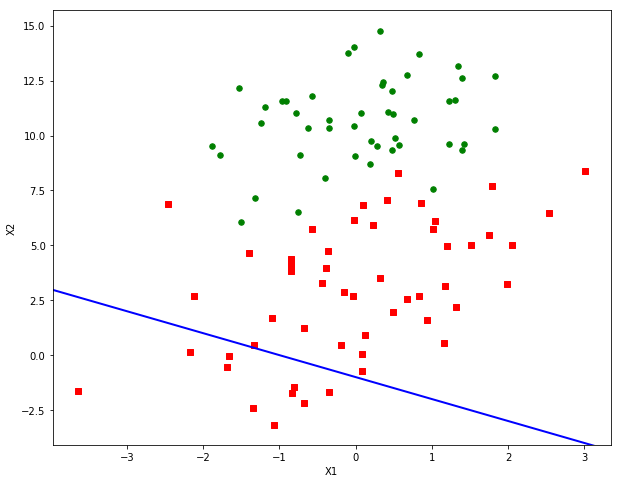

In [27]:
from matplotlib import pyplot as plt
from matplotlib import animation
from numpy import *
 
def loadDataSet():
    """
    
    """
    import pandas as pd
    df = pd.read_csv('testSet.txt',sep='\t',header= None)
    
    X,y = df.drop(2,axis =1).values,df[2].values
    return X,y
 
def sigmoid(inX):
    return 1.0/(1+exp(-inX))
 
def gradAscent(dataMatIn, classLabels, history_weight):
    """
    """
    dataMatrix = np.mat(dataMatIn)            
    labelMat = np.mat(classLabels).T 
    m,n = dataMatrix.shape                 
    alpha = 0.001                           
    iters = 500
    weights = np.ones((n,1))
    for k in range(iters):              #iteration
        h = sigmoid(dataMatrix*weights)     
        error = (labelMat - h)              
        weights += alpha * dataMatrix.transpose() * error  
        history_weight.append(weights.copy())
    return weights
 
history_weight = []
dataMat,labelMat=loadDataSet()
gradAscent(dataMat, labelMat, history_weight)

# Plotting
fig = plt.figure(figsize=(10,8))
currentAxis = plt.gca()
ax = fig.add_subplot(111)
xdata, ydata = [], []
line, = ax.plot([], [], 'b', lw=2)
 
def draw_line(weights):
    x = arange(-5.0, 5.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]  
    line.set_data(x, y)
    return line,
 
# initialization function: plot the background of each frame
def init():
    dataArr = dataMat
    n = dataArr.shape[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,0]); ycord1.append(dataArr[i,1])
        else:
            xcord2.append(dataArr[i,0]); ycord2.append(dataArr[i,1])
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    plt.xlabel('X1')
    plt.ylabel('X2')
 
    return draw_line(np.ones((n,1)))
 
# animation function.  this is called sequentially
def update(i):
    return draw_line(history_weight[i])
 

anim = animation.FuncAnimation(fig, update, init_func=init, frames=len(history_weight), interval=10, repeat=False,
                               blit=True)
plt.show()